# White Wine Quality Classifier

Classification result will be between 0-10. To make things simples we will re-class the range with 0-1.

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
# graph libs
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

## Importing the dataset

In [3]:
dataset = pd.read_csv("winequality-white.csv")

In [4]:
dataset.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


## Data inspection
This is a complete data set. No gaps were found in data

In [5]:
dataset.info()
dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Descriptive statistics
There is quite a bit of variation between means and standard deviations implying we should consider standardisng variables in pre-modelling

In [6]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Graphing and visualization of dataset

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

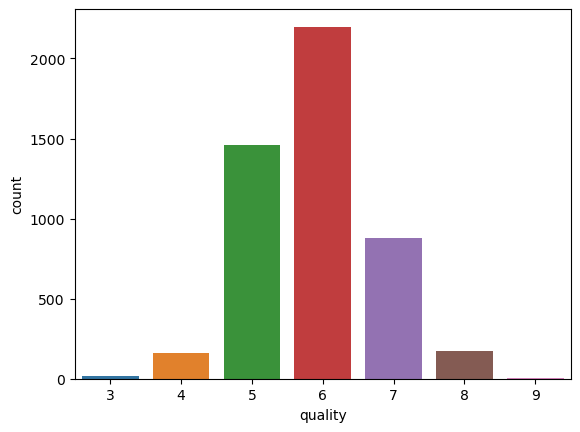

In [7]:
sb.countplot(x = "quality", data = dataset)
dataset["quality"].value_counts()

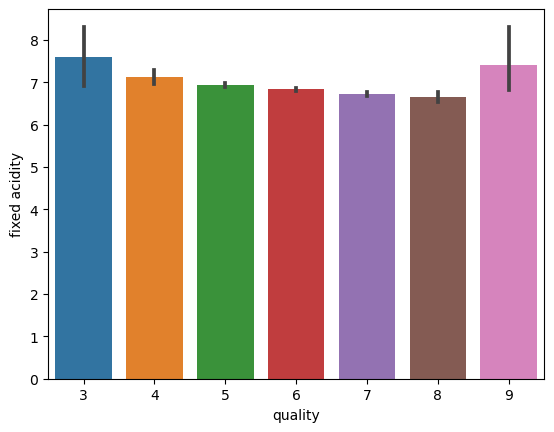

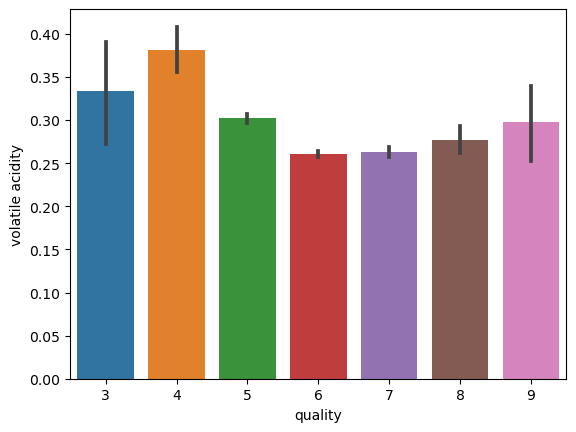

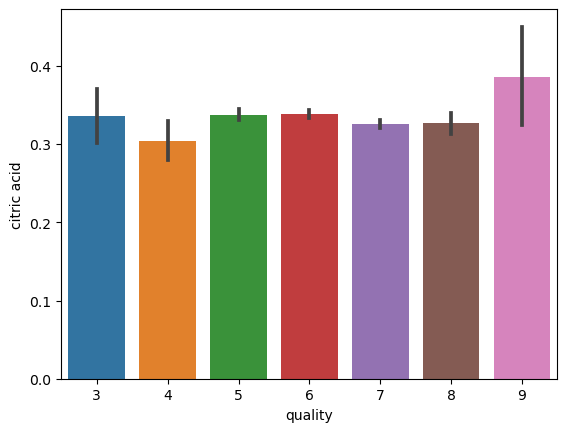

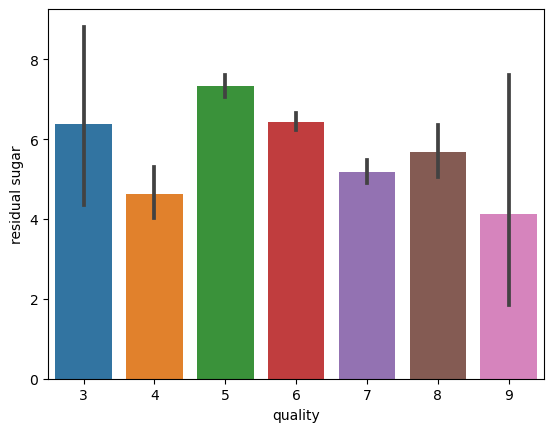

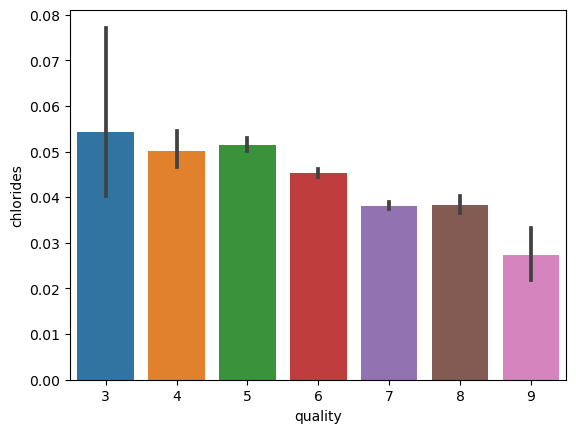

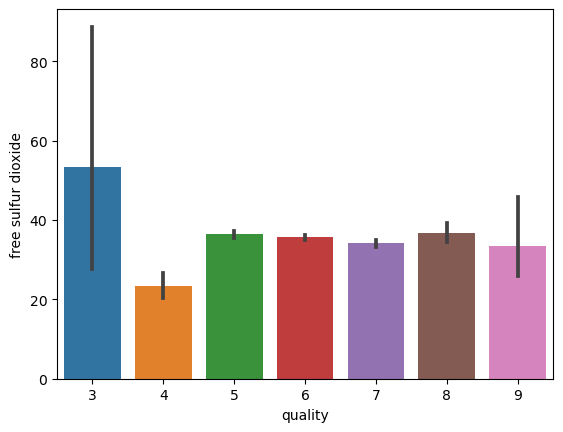

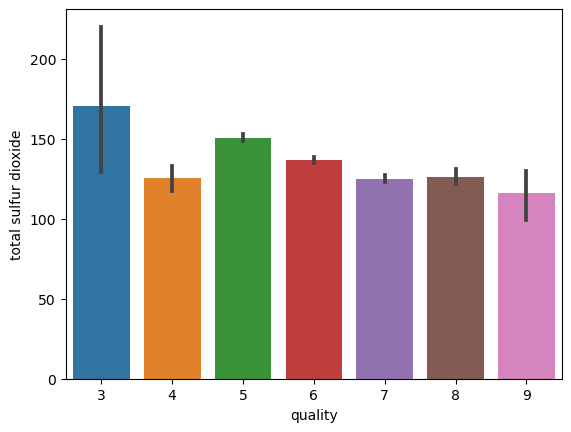

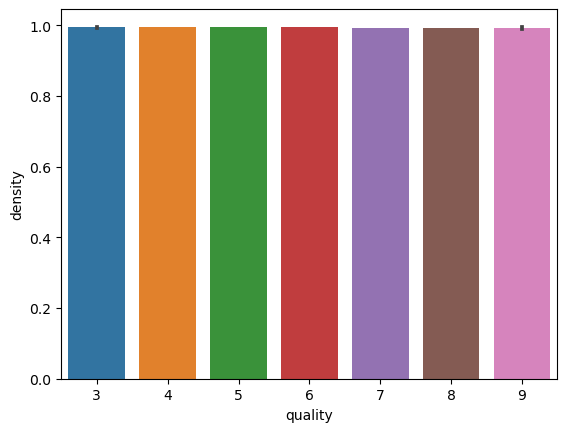

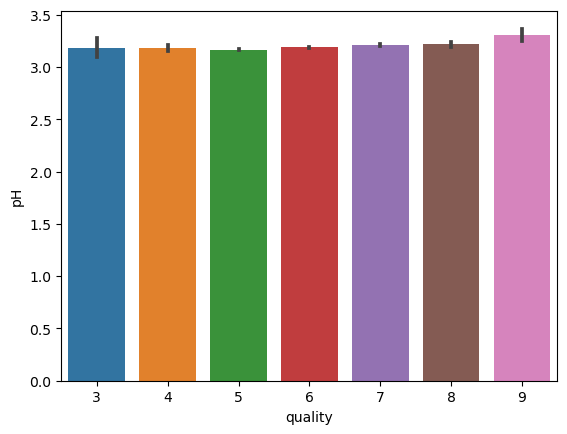

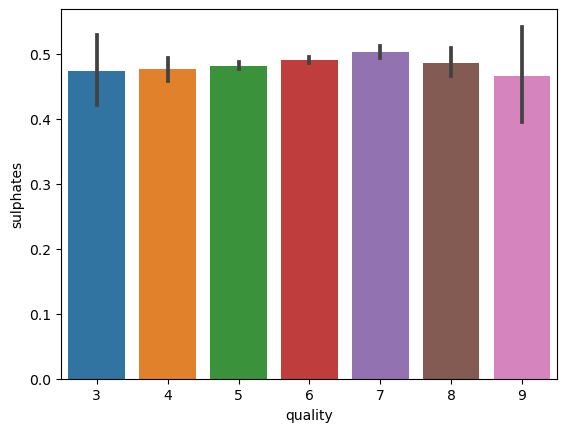

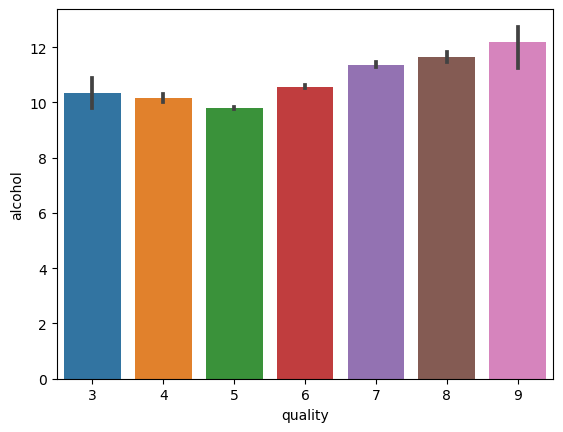

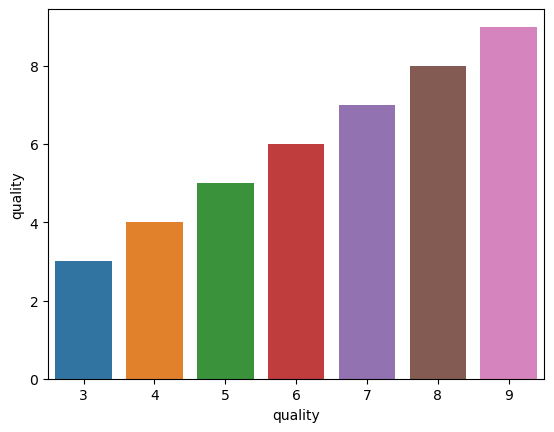

In [8]:
for i, col in enumerate(dataset.columns):
    plt.figure(i) # bk
    sb.barplot(x = "quality", y = col, data = dataset)

## Creating classification bins

We have 10 classes, which is quite much. To make things simpler we will make an assumption. We will consider that all the qualifications below 6.5 is bad = 0 and above good = 1.

We will do this with pandas cut method.

In [9]:
bins = (2, 6, 9)
group_names=list(("bad", "good"))
dataset["quality"] = pd.cut(dataset["quality"], bins = bins, labels = group_names)

In [10]:
dataset.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,bad
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,bad
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,bad
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,bad
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,bad
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,bad
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,bad
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,bad
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,bad
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,bad


# Setting the dependent and independent variables

In [11]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Encoding the dependent variable

In [12]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

## Splitting the dataset into the Training set and Test set

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 0)

## Feature scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [15]:
print(x_train)

[[-0.06063146 -0.97658604 -0.2763739  ... -1.24762216  0.2612727
  -1.22575244]
 [-0.89826042 -1.07649764  0.7221285  ... -2.11138608 -0.17659897
  -0.81879134]
 [-1.25724426 -0.17729323 -1.2748763  ...  1.54299975 -0.78961932
   0.40209197]
 ...
 [ 1.25564263  0.52208798 -0.44279096 ... -0.25097147 -0.96476799
  -1.38853689]
 [ 2.45225543 -0.17729323 -0.0267483  ... -0.38385823 -0.26417331
   0.23930753]
 [ 1.25564263  2.32049681  0.05646024 ... -0.64963175  0.17369837
  -0.41183024]]


In [16]:
print(x_test)

[[ 0.53767494  0.42217638  0.13966877 ...  0.34701894 -0.61447065
   0.15791531]
 [ 0.1786911   0.32226478 -0.60920803 ... -0.38385823 -0.26417331
  -0.57461468]
 [ 0.89665878 -1.37623245  3.38480157 ... -0.7825185  -0.78961932
   0.23930753]
 ...
 [-0.29995402 -1.17640924  1.9702565  ... -0.45030161 -0.87719365
  -0.98157578]
 [ 0.41801366  0.02252998 -0.60920803 ... -0.58318837  0.2612727
  -1.22575244]
 [ 0.29835238 -0.47702803  0.4725029  ...  0.41346231 -0.78961932
   1.78575973]]


## Training of all the models

To see all the models accuracy we will write a function that applies all models.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [18]:
def models(x, y):
    # Training of the Logistic Regression model
    log = LogisticRegression(random_state=0)
    log.fit(x, y)
    
    # Training of the KNN model
    knn = KNeighborsClassifier(n_neighbors = 10, metric = "minkowski", p = 2)
    knn.fit(x, y)
    
    # Training of the Linear SVM model
    svm1 = LinearSVC(max_iter = 10000, random_state = 0)
    svm1.fit(x, y)
    
    # Training of the RBF Kernel SVM model
    kernel_svm = SVC(kernel = "rbf", random_state = 0)
    kernel_svm.fit(x, y)
    
    # Training of the Naive Bayes
    naive = GaussianNB()
    naive.fit(x, y)
    
    # Training of the Decision Tree model
    dtree = DecisionTreeClassifier(criterion = "gini", random_state = 0)
    dtree.fit(x, y)
    
    # Training of the Random Forest model
    rforest = RandomForestClassifier(n_estimators = 70, criterion = "gini" ,random_state = 0)
    rforest.fit(x, y)
    
    print('[0]Logistic Regression Training Accuracy:', log.score(x, y))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(x, y))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svm1.score(x, y))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', kernel_svm.score(x, y))
    print('[4]Gaussian Naive Bayes Training Accuracy:', naive.score(x, y))
    print('[5]Decision Tree Classifier Training Accuracy:', dtree.score(x, y))
    print('[6]Random Forest Classifier Training Accuracy:', rforest.score(x, y))
    
    return log, knn, svm1, kernel_svm, naive, dtree, rforest

## Making the confusion matrix and accuracy score

In [19]:
model = models(x_train, y_train)

[0]Logistic Regression Training Accuracy: 0.8053539019963702
[1]K Nearest Neighbor Training Accuracy: 0.86002722323049
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.8098911070780399
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.8421052631578947
[4]Gaussian Naive Bayes Training Accuracy: 0.727994555353902
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9995462794918331


In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [21]:
for i in range(len(model)):
    print(confusion_matrix(y_test, model[i].predict(x_test)))
    print("Model[{}] Testing Accuracy".format(i),accuracy_score(y_test, model[i].predict(x_test)))
    print()

[[344  18]
 [ 97  31]]
Model[0] Testing Accuracy 0.7653061224489796

[[344  18]
 [ 78  50]]
Model[1] Testing Accuracy 0.8040816326530612

[[357   5]
 [101  27]]
Model[2] Testing Accuracy 0.7836734693877551

[[348  14]
 [ 87  41]]
Model[3] Testing Accuracy 0.7938775510204081

[[264  98]
 [ 41  87]]
Model[4] Testing Accuracy 0.7163265306122449

[[316  46]
 [ 52  76]]
Model[5] Testing Accuracy 0.8

[[349  13]
 [ 57  71]]
Model[6] Testing Accuracy 0.8571428571428571



**Our dataset don't have enough value, which labeled as good. Because of this classification of good wines not well.**